Here I have defined the symbols r1, r2, $\theta_1$, $\theta_2$, $\phi_1$ and $\phi_2$. I have also defined $x_1$, $y_1$, $z_1$ as functions of r1, $\theta_1$ and $\phi_1$ and same for $x_2$, $y_2$, $z_2$. At the end, I defined $\Psi$, V as functions of r1, r2, $\theta_1$, $\theta_2$, $\phi_1$ and $\phi_2$. I have defined $|\vec{r1}- \vec{r2}|$ as absolute_diff which I have equated to $\sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta)}$. We know that,
$$ \cos(\theta) = \frac{\vec{r1}.\vec{r2}}{|\vec{r1}||\vec{r2}|}$$

We define $\vec{r1}$ and $\vec{r2}$ in cartesian coordinates. That was the reason for defining $x_1$, $y_1$, $z_1$ as functions of r1, $\theta_1$ and $\phi_1$ and same for $x_2$, $y_2$, $z_2$. At the end, I also defined Laplacian operator in spherical coordinates and effective potential as V_eff, where

$$ V_eff = - \frac{2}{r_1} - \frac{2}{r_2} + \frac{1}{|\vec{r1}- \vec{r2}|}  $$

Here all operators defined here are just symbols (or expressions). They don't store any values.


In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) + (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) + (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) + (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Here Cartesian coordinates are written in terms of spherical coordinates.

In [2]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

Here I defined 7 basis wavefunctions symbolically as functions of $r_1$, $\theta_1$, $\phi_1$ and $r_2$, $\theta_2$, $\phi_2$. Angular parts appear due to the presence of $|\vec{r1}- \vec{r2}|$ factor in $\phi_3$, $\phi_6$ and $\phi_7$.

In [3]:
Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_4 = smp.Function('\Phi_4')(r1,theta1, phi1, r2, theta2, phi2)
Phi_5 = smp.Function('\Phi_5')(r1,theta1, phi1, r2, theta2, phi2)
Phi_6 = smp.Function('\Phi_6')(r1,theta1, phi1, r2, theta2, phi2)
Phi_7 = smp.Function('\Phi_7')(r1,theta1, phi1, r2, theta2, phi2)

In [4]:
## Symbolic Expressions of 7 basis wavefunction

Phi_1 = smp.exp(-2 * (r1 + r2))
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1 * r2
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1**2 + r2**2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)**2
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * (absolute_diff)

In [5]:
# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
cos_theta.simplify()  # Simplified expression of Cos(theta)

sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)

In [7]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_2 = Phi_2.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_3 = Phi_3.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_4 = Phi_4.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_5 = Phi_5.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_6 = Phi_6.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_7 = Phi_7.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

## The symbolic expressions of those 7 basis wavefunctions that I defined above, some Phi's have a factor where cos(theta) was appearing. I substituted that cos(theta) with
## cos_theta that I just found in the previous cell. Below same thing has been done for V_eff.

In [8]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [9]:
Hamiltonian

Psi(r1, theta_1, phi_1, r2, theta_2, phi_2)*V(r1, theta_1, phi_1, r2, theta_2, phi_2) + (r2**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r2))/r2**2 + (sin(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_2, 2)) + cos(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_2))/(r2**2*sin(theta_2)) + Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_2, 2))/(r2**2*sin(theta_2)**2) + (r1**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r1))/r1**2 + (sin(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_1, 2)) + cos(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_1))/(r1**2*sin(theta_1)) + Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_1, 2))/(r1**2*sin(theta_1)**2)

In [10]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify() ## Here I substituted Psi with Phi_i and V with V_eff. V was just the symbol that I defined in the first cell

In [11]:
H_Phi_2 = Hamiltonian.subs({Psi: Phi_2, V:V_eff}).simplify()

In [12]:
H_Phi_3 = Hamiltonian.subs({Psi: Phi_3, V:V_eff}).simplify()

In [13]:
H_Phi_4 = Hamiltonian.subs({Psi: Phi_4, V:V_eff}).simplify()

In [14]:
H_Phi_5 = Hamiltonian.subs({Psi: Phi_5, V:V_eff}).simplify()

In [15]:
H_Phi_6 = Hamiltonian.subs({Psi: Phi_6, V:V_eff}).simplify()

In [16]:
H_Phi_7 = Hamiltonian.subs({Psi: Phi_7, V:V_eff}).simplify()

$$ H_{ij} = \frac{∫\phi_i^* H \phi_j r1^2 r2^2 \sin(\theta_1)\sin(\theta_2) dr_1 dr_2 d\theta_1 d\theta_2 d\phi_1 d\phi_2}{∫\phi_i^* \phi_j r1^2 r2^2 \sin(\theta_1)\sin(\theta_2) dr_1 dr_2 d\theta_1 d\theta_2 d\phi_1 d\phi_2}$$

\\

$$ f_{ij} = \phi_i^* H \phi_j r1^2 r2^2 \sin(\theta_1)\sin(\theta_2) $$
$$ g_{ij} = \phi_i^* \phi_j r1^2 r2^2 \sin(\theta_1)\sin(\theta_2) $$

In [17]:
## I haven't mentioned the expressions of f_ii and g_ii explicitly because it was taking too much time (around 5-6 minutes for some functions) to get an output

f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2) ## Numerator
g_11 = (Phi_1 * Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2) ## Denominator

In [18]:
f_12 = (Phi_1 * H_Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_12 = (Phi_1 * Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [19]:
f_13 = (Phi_1 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_13 = (Phi_1 * Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [20]:
f_14 = (Phi_1 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_14 = (Phi_1 * Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [21]:
f_15 = (Phi_1 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_15 = (Phi_1 * Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [22]:
f_16 = (Phi_1 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_16 = (Phi_1 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [23]:
f_17 = (Phi_1 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_17 = (Phi_1 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [24]:
f_22 = (Phi_2 * H_Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_22 = (Phi_2 * Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [25]:
f_23 = (Phi_2 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_23 = (Phi_2 * Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [26]:
f_24 = (Phi_2 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_24 = (Phi_2 * Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [27]:
f_25 = (Phi_2 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_25 = (Phi_2 * Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [28]:
f_26 = (Phi_2 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_26 = (Phi_2 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [29]:
f_27 = (Phi_2 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_27 = (Phi_2 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [30]:
f_33 = (Phi_3 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_33 = (Phi_3 * Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [31]:
f_34 = (Phi_3 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_34 = (Phi_3 * Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [32]:
f_35 = (Phi_3 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_35 = (Phi_3 * Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [33]:
f_36 = (Phi_3 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_36 = (Phi_3 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [34]:
f_37 = (Phi_3 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_37 = (Phi_3 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [35]:
f_44 = (Phi_4 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_44 = (Phi_4 * Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [36]:
f_45 = (Phi_4 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_45 = (Phi_4 * Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [37]:
f_46 = (Phi_4 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_46 = (Phi_4 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [38]:
f_47 = (Phi_4 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_47 = (Phi_4 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [39]:
f_55 = (Phi_5 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_55 = (Phi_5 * Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [40]:
f_56 = (Phi_5 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_56 = (Phi_5 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [41]:
f_57 = (Phi_5 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_57 = (Phi_5 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [42]:
f_66 = (Phi_6 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_66 = (Phi_6 * Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [43]:
f_67 = (Phi_6 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_67 = (Phi_6 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [44]:
f_77 = (Phi_7 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
g_77 = (Phi_7 * Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [45]:
P_1 = f_11 + f_22 + f_33 + f_44 + f_55 + f_66 + f_77  ## Sampling function for f_ij
G_1 = g_11 + g_22 + g_33 + g_44 + g_55 + g_66 + g_77  ## Sampling function for g_ij

In [46]:
## lambdify allows to convert symbolic expressions into numpy arrays.

f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
f_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_12)
f_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_13)
f_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_14)
f_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_15)
f_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_16)
f_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_17)
f_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_22)
f_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_23)
f_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_24)
f_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_25)
f_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_26)
f_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_27)
f_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_33)
f_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_34)
f_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_35)
f_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_36)
f_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_37)
f_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_44)
f_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_45)
f_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_46)
f_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_47)
f_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_55)
f_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_56)
f_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_57)
f_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_66)
f_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_67)
f_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_77)

P_1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], P_1)
G_1_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], G_1)

In [47]:
g_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_11)
g_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_12)
g_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_13)
g_14_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_14)
g_15_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_15)
g_16_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_16)
g_17_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_17)
g_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_22)
g_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_23)
g_24_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_24)
g_25_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_25)
g_26_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_26)
g_27_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_27)
g_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_33)
g_34_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_34)
g_35_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_35)
g_36_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_36)
g_37_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_37)
g_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_44)
g_45_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_45)
g_46_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_46)
g_47_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_47)
g_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_55)
g_56_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_56)
g_57_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_57)
g_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_66)
g_67_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_67)
g_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_77)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 5, 10)
r2 = np.linspace(0, 5, 10)

theta1 = np.linspace(0, np.pi, 10)
theta2 = np.linspace(0, np.pi, 10)

phi1 = np.linspace(0, 2*np.pi, 10)
phi2 = np.linspace(0, 2*np.pi, 10)

R1, Theta1, Phi1, R2, Theta2, Phi2 = np.meshgrid(r1, theta1, phi1, r2, theta2, phi2)

In [49]:
## Here except r1, I kept other variables as constants. We can make 2d plots using this.

f_11_2d = f_11_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_12_2d = f_12_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_13_2d = f_13_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_14_2d = f_14_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_15_2d = f_15_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_16_2d = f_16_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_17_2d = f_17_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_22_2d = f_22_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_23_2d = f_23_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_24_2d = f_24_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_25_2d = f_25_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_26_2d = f_26_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_27_2d = f_27_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_33_2d = f_33_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_34_2d = f_34_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_35_2d = f_35_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_36_2d = f_36_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_37_2d = f_37_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_44_2d = f_44_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_45_2d = f_45_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_46_2d = f_46_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_47_2d = f_47_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_55_2d = f_55_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_56_2d = f_56_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_57_2d = f_57_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_66_2d = f_66_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_67_2d = f_67_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_77_2d = f_77_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)

P_1_2d = P_1_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
G_1_2d = G_1_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)


<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in multiply
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-r1*(r1*r2*sin(theta_1)*sin(theta_2)*sin(phi_1 - phi_2)**2/(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - cos(phi_1 - phi_2))*exp(-2*r1 - 2*r2)*s

In [50]:
g_11_2d = g_11_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_12_2d = g_12_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_13_2d = g_13_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_14_2d = g_14_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_15_2d = g_15_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_16_2d = g_16_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_17_2d = g_17_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_22_2d = g_22_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_23_2d = g_23_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_24_2d = g_24_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_25_2d = g_25_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_26_2d = g_26_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_27_2d = g_27_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_33_2d = g_33_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_34_2d = g_34_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_35_2d = g_35_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_36_2d = g_36_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_37_2d = g_37_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_44_2d = g_44_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_45_2d = g_45_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_46_2d = g_46_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_47_2d = g_47_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_55_2d = g_55_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_56_2d = g_56_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_57_2d = g_57_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_66_2d = g_66_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_67_2d = g_67_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_77_2d = g_77_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)

<lambdifygenerated-33>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi_1)*sin(phi_2)*sin(theta_1)*sin(theta_2) + r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1)*cos(phi_2) + r1*r2*cos(theta_1)*cos(theta_2))/(sqrt(r1**2*sin(phi_1)**2*sin(theta_1)**2 + r1**2*sin(theta_1)**2*cos(phi_1)**2 + r1**2*cos(theta_1)**2)*sqrt(r2**2*sin(phi_2)**2*sin(theta_2)**2 + r2**2*sin(theta_2)**2*cos(phi_2)**2 + r2**2*cos(theta_2)**2)) + r2**2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-36>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(r1**2 - 2*r1*r2*(r1*r2*sin(phi_1)*sin(phi_2)*sin(theta_1)*sin(theta_2) + r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1)*cos(phi_2) + r1*r2*cos(theta_1)*cos(theta_2))/(sqrt(r1**2*sin(phi_1)**2*sin(theta_1)**2 + r1**2*sin(theta_1)**2*cos(phi_1)**2 + r1**2*cos(theta_1)**2)*sqrt(r2**2*sin(phi_2)**2*sin(theta_2)**2 + r2**2*sin(theta_2)**2*cos(phi_2)**2 + r2**2*cos(theta_2)**2))

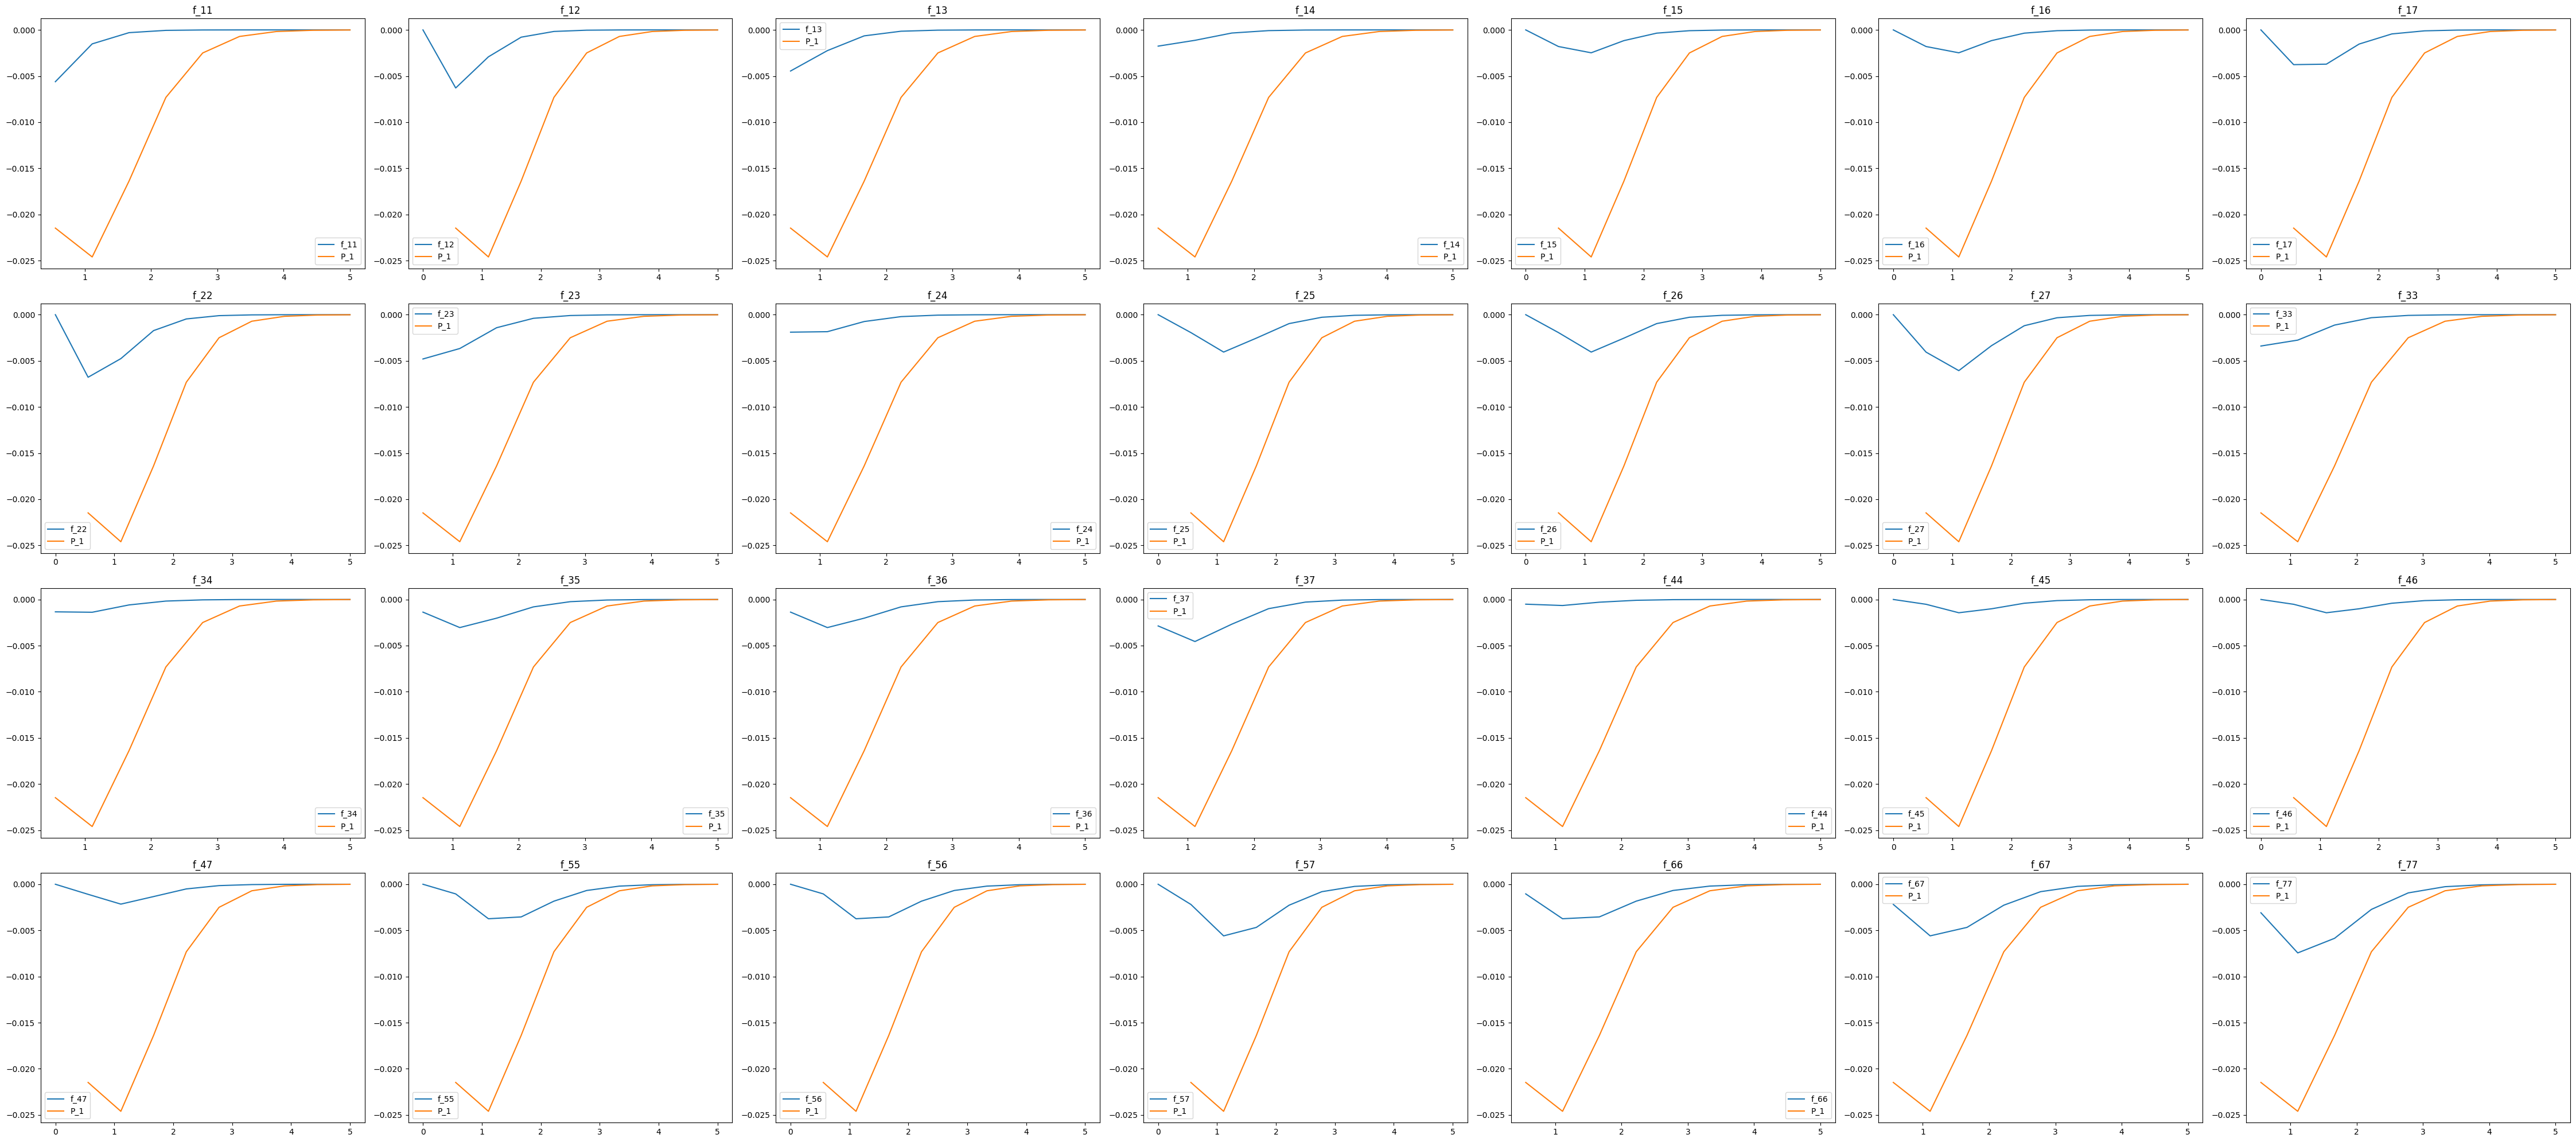

In [54]:
fig, axes = plt.subplots(4, 7, figsize=(45,20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f_11_2d, f_12_2d, f_13_2d, f_14_2d, f_15_2d, f_16_2d, f_17_2d, f_22_2d, f_23_2d, f_24_2d, f_25_2d, f_26_2d, f_27_2d, f_33_2d, f_34_2d, f_35_2d, f_36_2d, f_37_2d,
             f_44_2d, f_45_2d, f_46_2d, f_47_2d, f_55_2d, f_56_2d, f_57_2d, f_66_2d, f_67_2d, f_77_2d]
titles = ['f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_33', 'f_34',
          'f_35', 'f_36', 'f_37', 'f_44', 'f_45', 'f_46', 'f_47', 'f_55', 'f_56', 'f_57', 'f_66', 'f_67', 'f_77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, P_1_2d, label = 'P_1')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

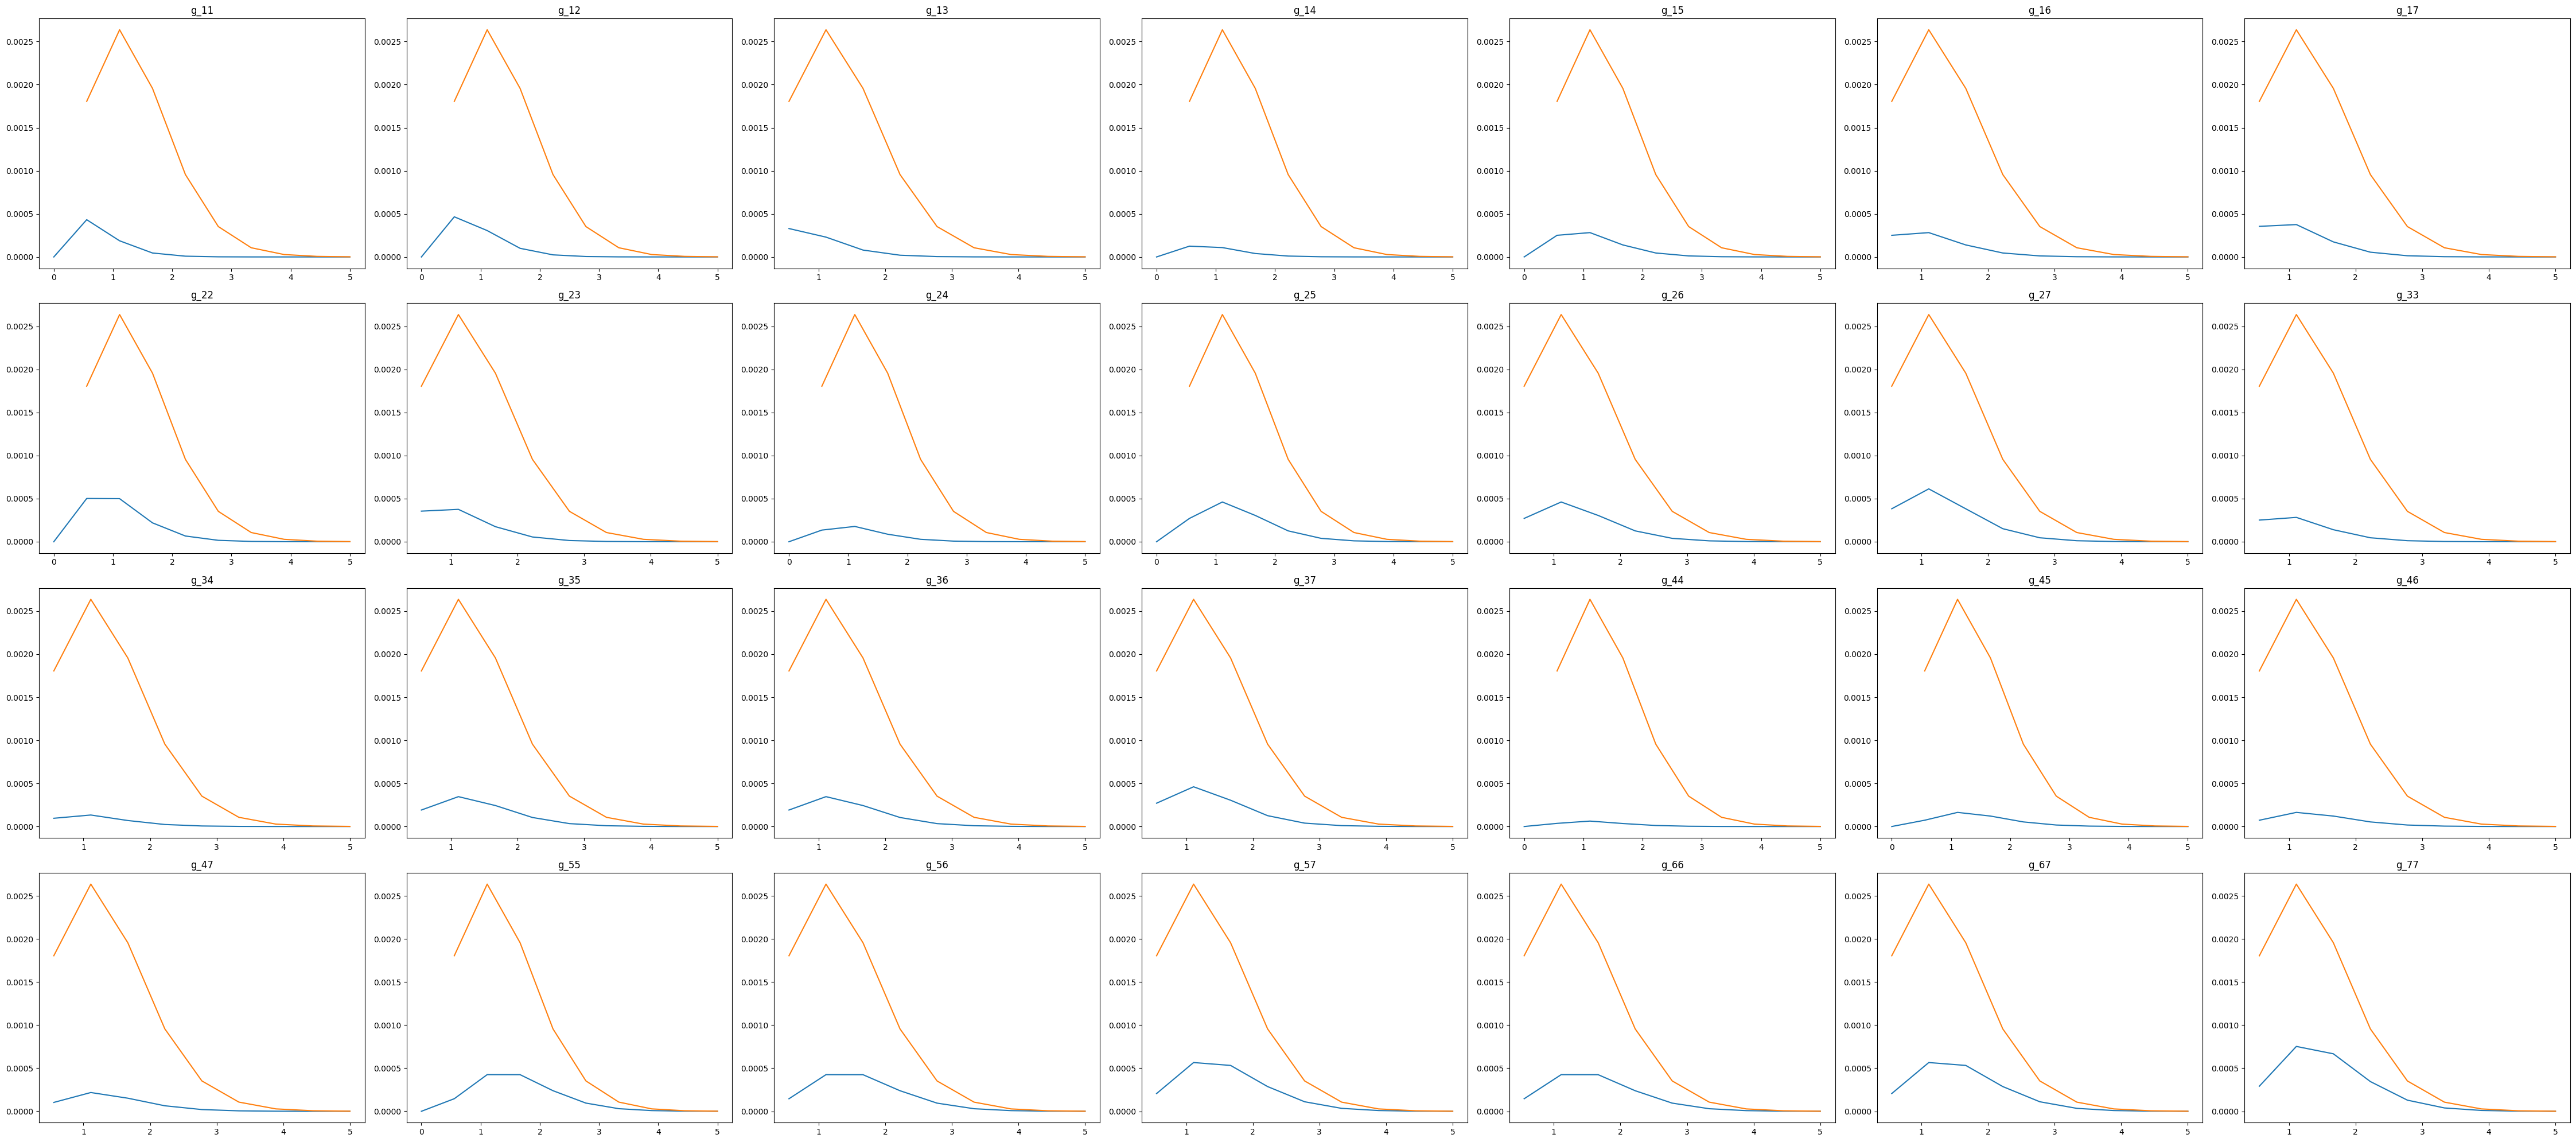

In [55]:
fig, axes = plt.subplots(4, 7, figsize=(45,20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [g_11_2d, g_12_2d, g_13_2d, g_14_2d, g_15_2d, g_16_2d, g_17_2d, g_22_2d, g_23_2d, g_24_2d, g_25_2d, g_26_2d, g_27_2d, g_33_2d, g_34_2d, g_35_2d, g_36_2d, g_37_2d,
             g_44_2d, g_45_2d, g_46_2d, g_47_2d, g_55_2d, g_56_2d, g_57_2d, g_66_2d, g_67_2d, g_77_2d]
titles = ['g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16', 'g_17', 'g_22', 'g_23', 'g_24', 'g_25', 'g_26', 'g_27', 'g_33', 'g_34',
          'g_35', 'g_36', 'g_37', 'g_44', 'g_45', 'g_46', 'g_47', 'g_55', 'g_56', 'g_57', 'g_66', 'g_67', 'g_77']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    ax.plot(r1, G_1_2d, label = 'G_1')
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

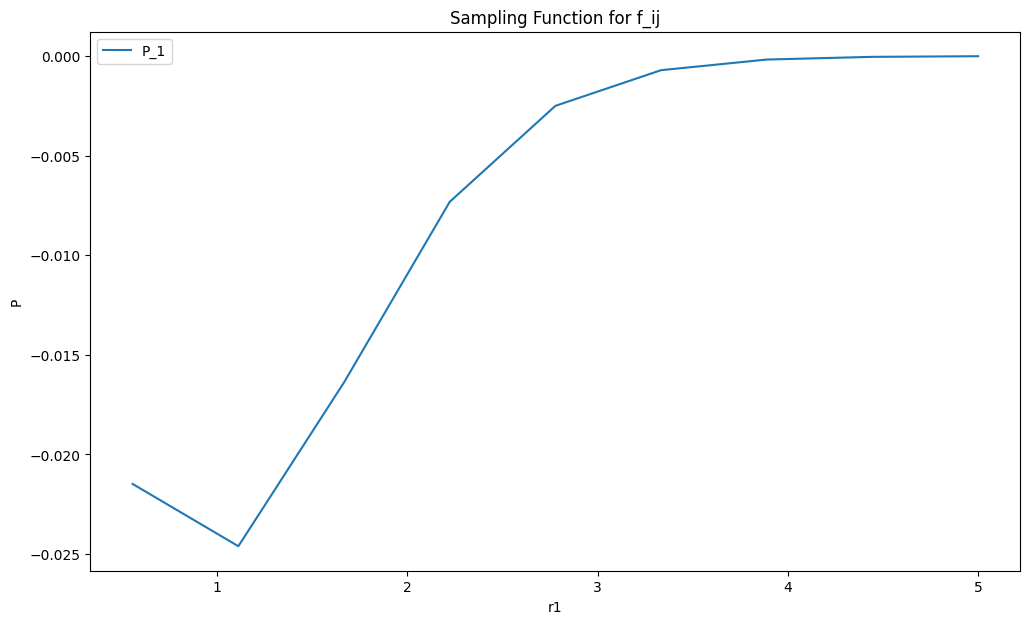

In [52]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(r1, P_1_2d, label = 'P_1')
ax.set_title('Sampling Function for f_ij')
ax.set_xlabel('r1')
ax.set_ylabel('P')
ax.legend()

plt.show()

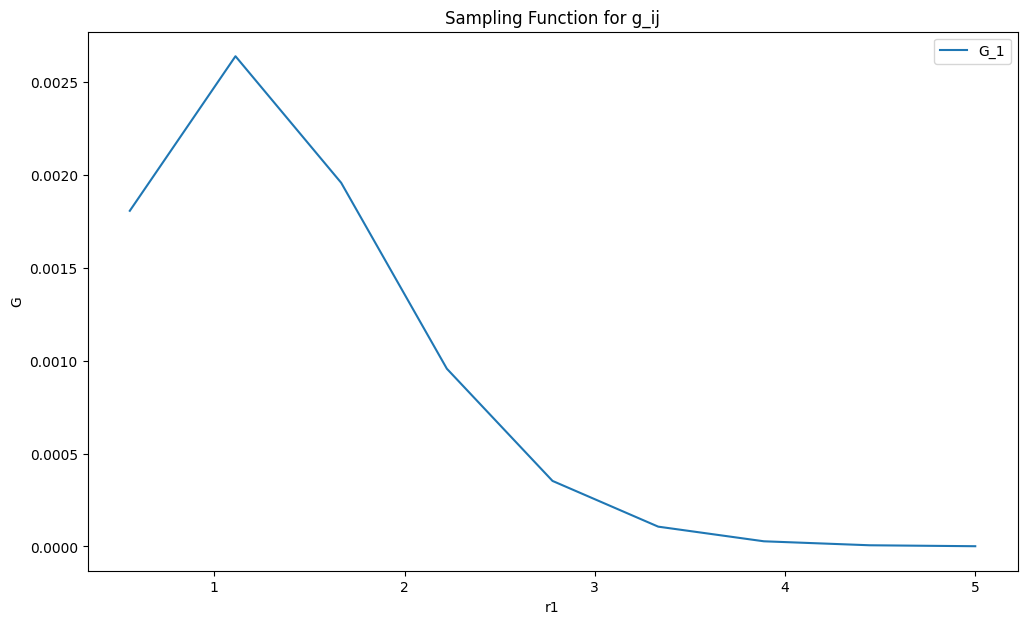

In [53]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(r1, G_1_2d, label = 'G_1')
ax.set_title('Sampling Function for g_ij')
ax.set_xlabel('r1')
ax.set_ylabel('G')
ax.legend()

plt.show()

In [56]:
F_11_6d = f_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
G_11_6d = g_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
P_1_6d = P_1_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
G_1_6d = G_1_f(R1, Theta1, Phi1, R2, Theta2, Phi2)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in subtract
  return r1**2*r2**2*(8*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*exp(-2*r1 - 2*r2)/r2 - 6*exp(-2*r1 - 2*r2)/r1)*exp(-2*r1 - 2*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-29>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1**3*r2**3*(r1*r2*exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) + 4*r1*(r2 - 1)*exp(-2*r1 - 2*r2) - 2*r1*exp(-2*r1 - 2*r2) + 4*r2*(r1 - 1)*ex

In [58]:
print(np.isnan(F_11_6d).any())
print(np.isnan(P_1_6d).any())
print(np.isnan(G_11_6d).any())
print(np.isnan(G_1_6d).any())

print(np.isinf(F_11_6d).any())
print(np.isinf(P_1_6d).any())
print(np.isinf(G_11_6d).any())
print(np.isinf(G_1_6d).any())

True
True
False
True
True
False
False
False


In [59]:
print(P_1_6d.shape)
print(G_11_6d.shape)
print(F_11_6d.shape)
print(G_1_6d.shape)

(10, 10, 10, 10, 10, 10)
(10, 10, 10, 10, 10, 10)
(10, 10, 10, 10, 10, 10)
(10, 10, 10, 10, 10, 10)


## Monte Carlo Integration and Metropolis Algorithm

In [60]:
r1 = np.linspace(0, 5, 10)
r2 = np.linspace(0, 5, 10)

theta1 = np.linspace(0, np.pi, 10)
theta2 = np.linspace(0, np.pi, 10)

phi1 = np.linspace(0, 2*np.pi, 10)
phi2 = np.linspace(0, 2*np.pi, 10)

R1, Theta1, Phi1, R2, Theta2, Phi2 = np.meshgrid(r1, theta1, phi1, r2, theta2, phi2)

In [61]:
import pandas as pd

# Flatten the arrays
R1_flat = R1.flatten()
R2_flat = R2.flatten()
Theta1_flat = Theta1.flatten()
Theta2_flat = Theta2.flatten()
Phi1_flat = Phi1.flatten()
Phi2_flat = Phi2.flatten()
F11_flat = F_11_6d.flatten()
G11_flat = G_11_6d.flatten()
P1_flat = P_1_6d.flatten()
G1_flat = G_1_6d.flatten()

# Create the DataFrame
df = pd.DataFrame({'r1': R1_flat, 'theta1': Theta1_flat, 'phi1': Phi1_flat, 'r2': R2_flat, 'theta2': Theta2_flat, 'phi2': Phi2_flat, 'F11': F11_flat, 'G11': G11_flat, 'P1': P1_flat, 'G1': G1_flat})

# Display the DataFrame
df

,r1,theta1,phi1,r2,theta2,phi2,F11,G11,P1,G1
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000e+00,NaN,NaN
1,0.0,0.000000,0.000000,0.0,0.000000,0.698132,NaN,0.000000e+00,NaN,NaN
2,0.0,0.000000,0.000000,0.0,0.000000,1.396263,NaN,0.000000e+00,NaN,NaN
3,0.0,0.000000,0.000000,0.0,0.000000,2.094395,NaN,0.000000e+00,NaN,NaN
4,0.0,0.000000,0.000000,0.0,0.000000,2.792527,NaN,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
999995,5.0,3.141593,6.283185,5.0,3.141593,3.490659,inf,3.982194e-47,NaN,1.284656e-43
999996,5.0,3.141593,6.283185,5.0,3.141593,4.188790,inf,3.982194e-47,NaN,1.284656e-43
999997,5.0,3.141593,6.283185,5.0,3.141593,4.886922,inf,3.982194e-47,NaN,1.284656e-43
999998,5.0,3.141593,6.283185,5.0,3.141593,5.585054,inf,3.982194e-47,NaN,1.284656e-43


In [62]:
# Remove rows with nan or inf values in 'F11' or 'P1' columns
df_new = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['F11', 'P1', 'G11', 'G1'])

# Display the cleaned DataFrame
df_new

,r1,theta1,phi1,r2,theta2,phi2,F11,G11,P1,G1
110111,0.555556,0.349066,0.000000,0.555556,0.349066,0.698132,-7.729049e-04,1.308626e-04,-8.406136e-04,3.597286e-04
110112,0.555556,0.349066,0.000000,0.555556,0.349066,1.396263,-1.244010e-03,1.308626e-04,-2.270266e-03,3.726658e-04
110113,0.555556,0.349066,0.000000,0.555556,0.349066,2.094395,-1.382105e-03,1.308626e-04,-2.846671e-03,3.879594e-04
110114,0.555556,0.349066,0.000000,0.555556,0.349066,2.792527,-1.430065e-03,1.308626e-04,-3.120512e-03,3.982756e-04
110115,0.555556,0.349066,0.000000,0.555556,0.349066,3.490659,-1.430065e-03,1.308626e-04,-3.120512e-03,3.982756e-04
...,...,...,...,...,...,...,...,...,...,...
999985,5.000000,3.141593,6.283185,5.000000,2.792527,3.490659,6.868500e-31,1.112150e-31,1.937057e-27,3.936615e-28
999986,5.000000,3.141593,6.283185,5.000000,2.792527,4.188790,6.868500e-31,1.112150e-31,1.943110e-27,3.936615e-28
999987,5.000000,3.141593,6.283185,5.000000,2.792527,4.886922,6.868500e-31,1.112150e-31,1.942069e-27,3.936615e-28
999988,5.000000,3.141593,6.283185,5.000000,2.792527,5.585054,6.868500e-31,1.112150e-31,1.939628e-27,3.936615e-28


In [63]:
X_features = df_new.iloc[:, :6].to_numpy()
yf_labels = df_new.iloc[:, 6:8].to_numpy()
yp_labels = df_new.iloc[:, 8:].to_numpy()

print(X_features.shape)
print(yf_labels.shape)
print(yp_labels.shape)

(654693, 6)
(654693, 2)
(654693, 2)


In [64]:
# Define the function
def f(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = f_11_f(r1, theta1, phi1, r2, theta2, phi2) # f_11_f was the lambdified function which converts symbolic expression into numpy arrays

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi2 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result) or np.isinf(result):
          return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity

        else:
          return result

    else:
        return 0   ## The function will return 0 if any of the r1, r2, theta1, theta2, phi1 and phi2 lies outside of their range

def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p = P_1_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi1 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result_p) or np.isinf(result_p):
          return -np.inf

        else:
          return result_p

    else:
        return 0

def metropolis_sampling(f,p,initial, num_samples, proposal_std):  # Sampling has been done using metropolis algorithm. Here sample is a vector X having 6 components
    samples = []
    current = initial # initial sample which we choose by ourselves. We equated initial sample to current sample
    num_accept = 0

    for _ in range(num_samples):
        while True:
            # Propose a new candidate from a normal distribution. Here proposal_std is the standard deviation which we choose by ourselves.
            candidate = np.random.normal(current, proposal_std)

            # Ensure the candidate falls within the specified bounds
            if (0 <= candidate[0] <= 5 and 0 <= candidate[3] <= 5 and
                0 <= candidate[1] <= np.pi and 0 <= candidate[4] <= np.pi and
                0 <= candidate[2] <= 2*np.pi and 0 <= candidate[5] <= 2*np.pi):

                candidate_value_f = f(candidate)
                candidate_value_p = p(candidate)

                # Discard if candidate value is NaN or inf
                if candidate_value_f != -np.inf or candidate_value_p != -np.inf:
                    break

        # Calculate acceptance probability
        acceptance_prob = min(1, candidate_value_p / p(current))

        # Accept or reject the candidate
        if np.random.uniform() < acceptance_prob:
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

# Monte Carlo integration
def monte_carlo_integration(samples, f):

    values_f = np.array([f(sample) for sample in samples])
    # Filter out -inf values
    values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

    return np.mean(values_f) * (5 * 5 * np.pi * np.pi * 2*np.pi * 2*np.pi)   ## For 1D integration, I = (b-a) * summation(f(x_i)/N). The same is written for 6D.

In [65]:
X_features[11021]

array([1.11111111, 0.34906585, 2.0943951 , 3.33333333, 2.0943951 ,
       5.58505361])

In [66]:
# Parameters
initial_point = X_features[11021]
num_samples = 10000
proposal_std = 1.8

# Run Metropolis sampling
result = metropolis_sampling(f,p,initial_point, num_samples, proposal_std)

samples_f = result[0]
num_accept = result[1]

# Perform Monte Carlo integration
integral_estimate_f11 = monte_carlo_integration(samples_f, f)
print(f"Estimated integral: {integral_estimate_f11}")

Estimated integral: -21.399548790786856


In [67]:
print("Number of Samples Collected: %s"%len(samples_f))
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Number of Samples Collected: 10000
Number of Samples Accepted: 2120
Fraction Acceptances: 0.212


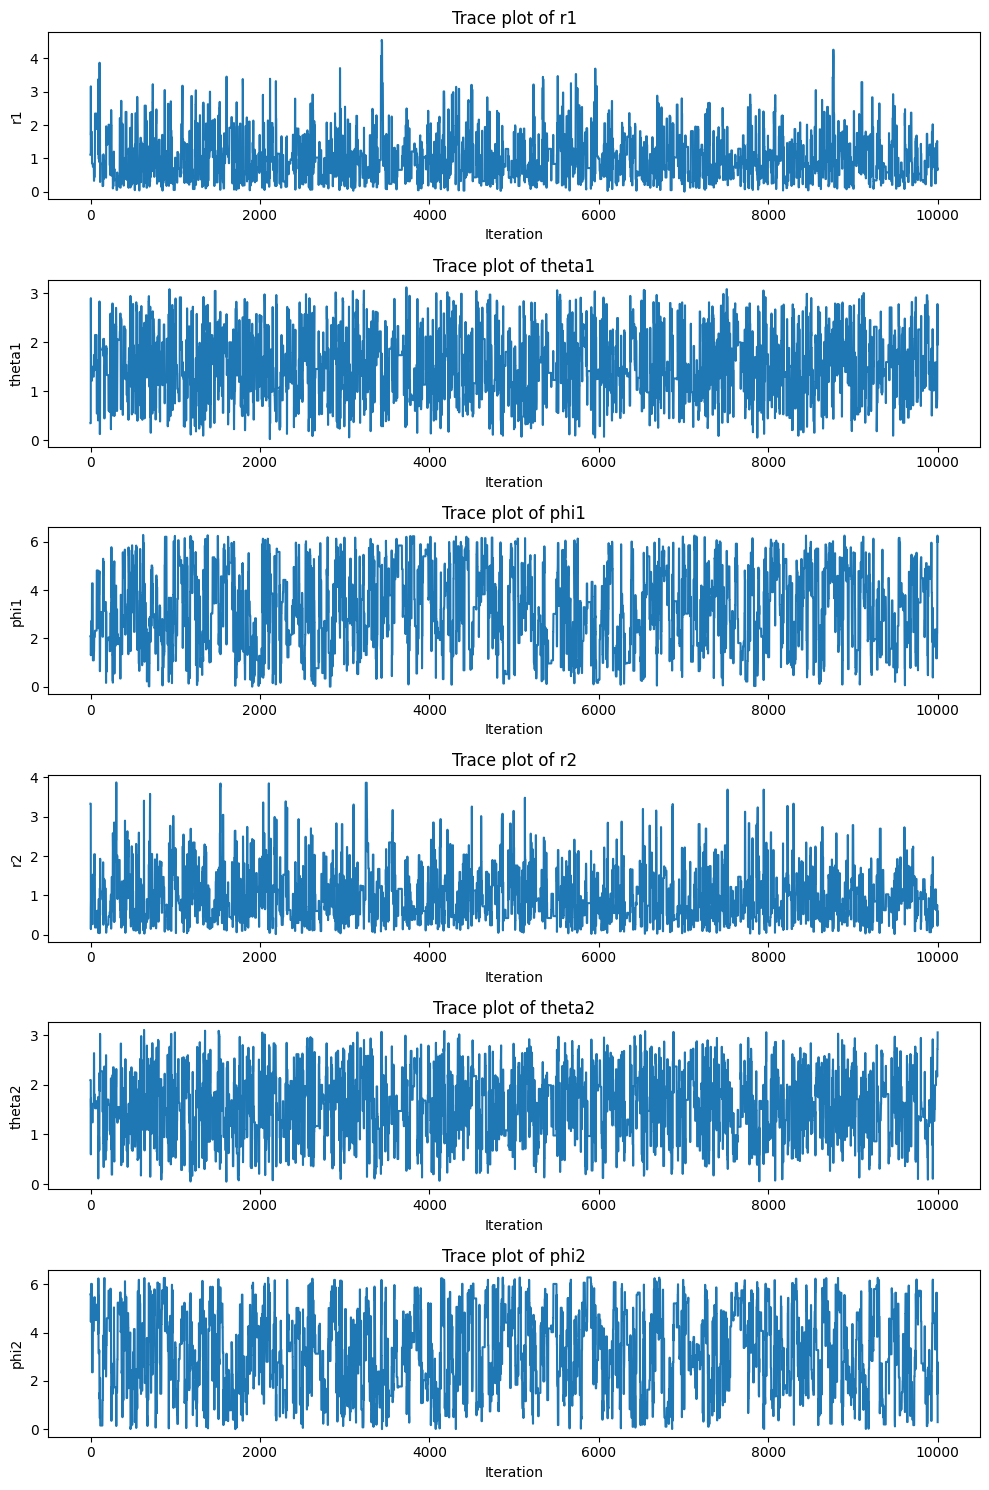

In [68]:
import matplotlib.pyplot as plt

# Plotting the trace of the samples for each variable. This will help to understand how the samples are evolving over iterations and whether they are mixing well.

# Assuming samples is a NumPy array of shape (num_samples, 6)
fig, axs = plt.subplots(6, 1, figsize=(10, 15))
variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']

for i in range(6):
    axs[i].plot(samples_f[:, i])
    axs[i].set_title(f'Trace plot of {variables[i]}')
    axs[i].set_xlabel('Iteration')
    axs[i].set_ylabel(variables[i])

plt.tight_layout()
plt.show()

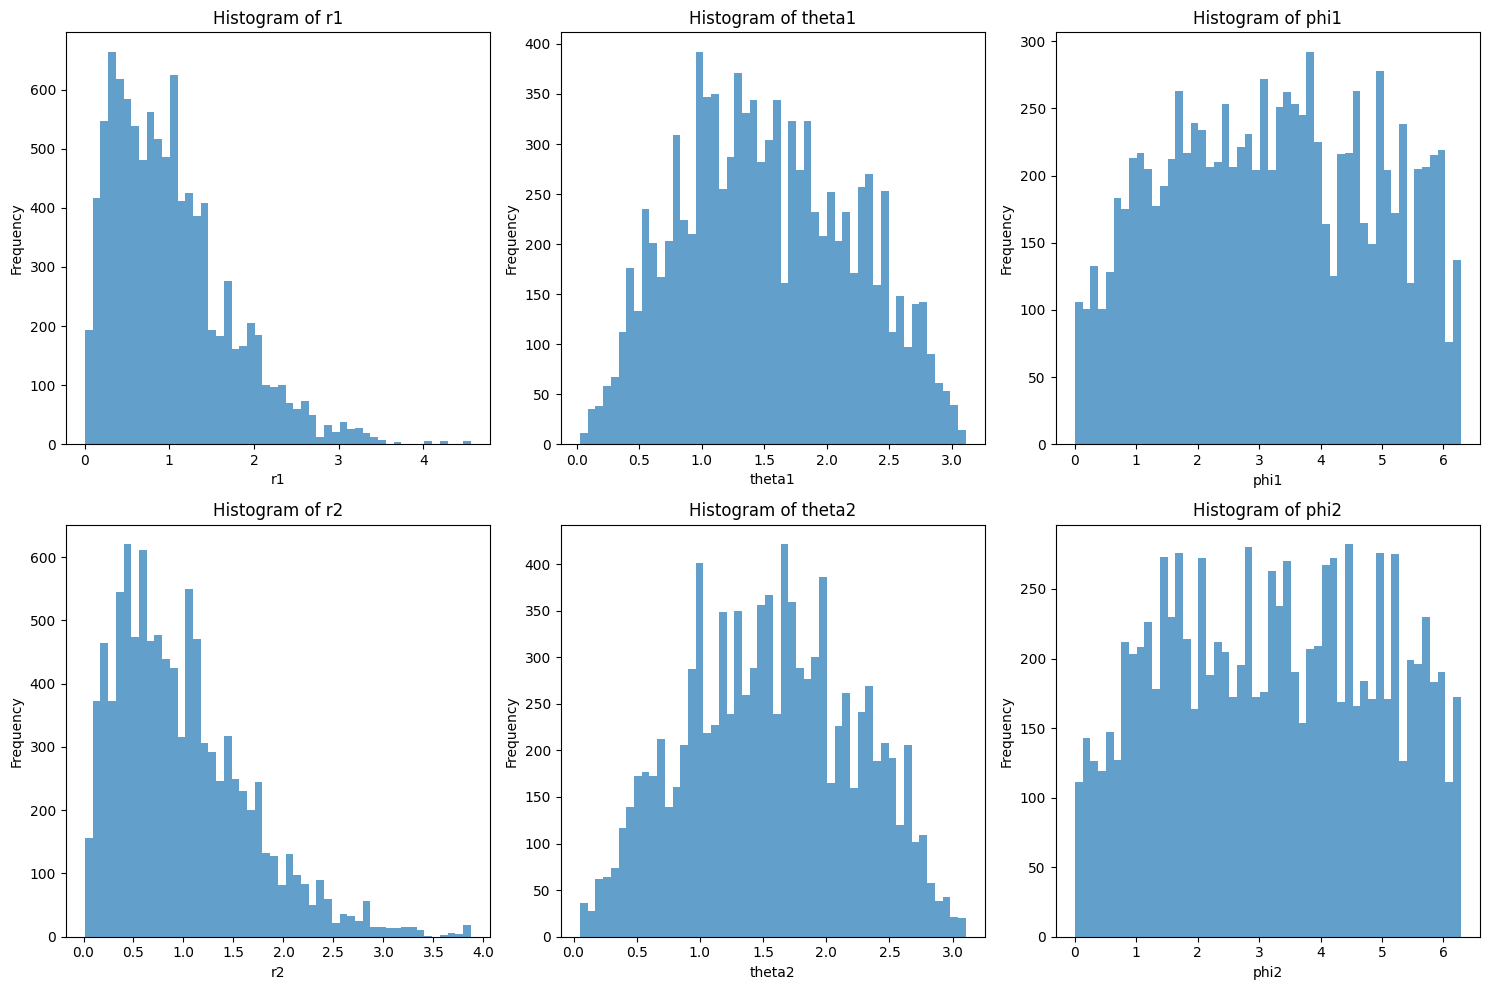

In [69]:
# Plotting histograms for each of the variables to see the distribution of the samples.

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_f[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]}')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

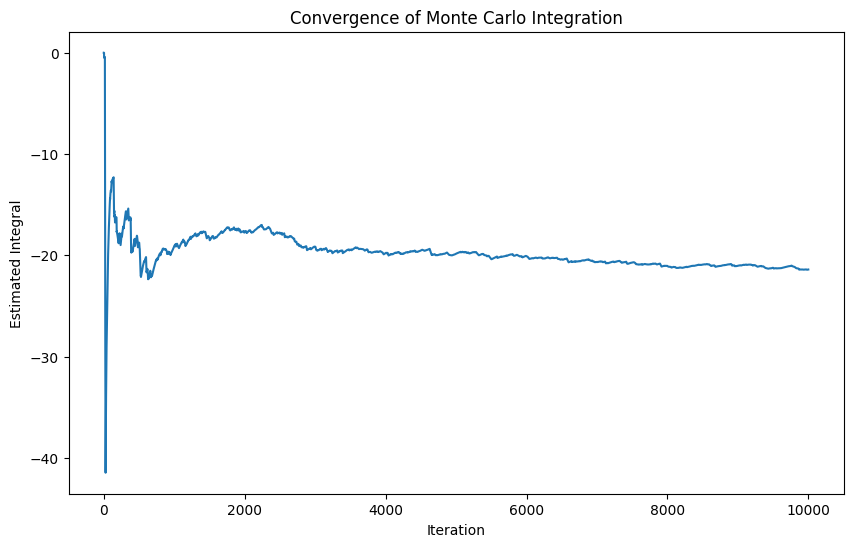

In [70]:
# Plot the running mean of the estimated integral over iterations to see if the Monte Carlo estimate is converging.

values_f = np.array([f(sample) for sample in samples_f])
# Filter out -inf values
values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

# Running mean of the integral estimate
integral_estimates = np.cumsum(values_f) * (5 * 5 * np.pi * np.pi * 2*np.pi * 2*np.pi) / np.arange(1, len(values_f) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration')
plt.show()

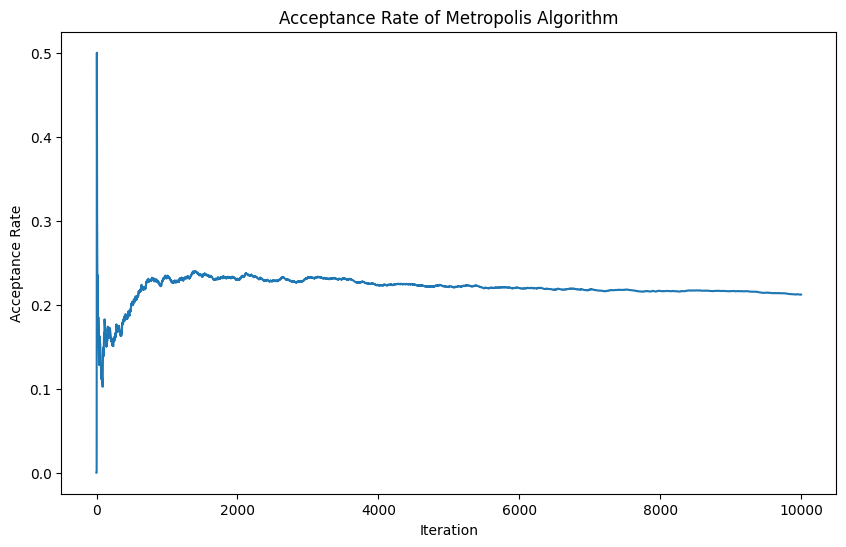

In [71]:
# Plotting the acceptance rate over iterations to understand the efficiency of the Metropolis algorithm. We plot the ratio of accepted moves to the total number of moves
# over iterations.

acceptance_rates = np.cumsum(np.diff(samples_f, axis=0).any(axis=1)) / np.arange(1, num_samples)
plt.figure(figsize=(10, 6))
plt.plot(acceptance_rates)
plt.xlabel('Iteration')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Metropolis Algorithm')
plt.show()

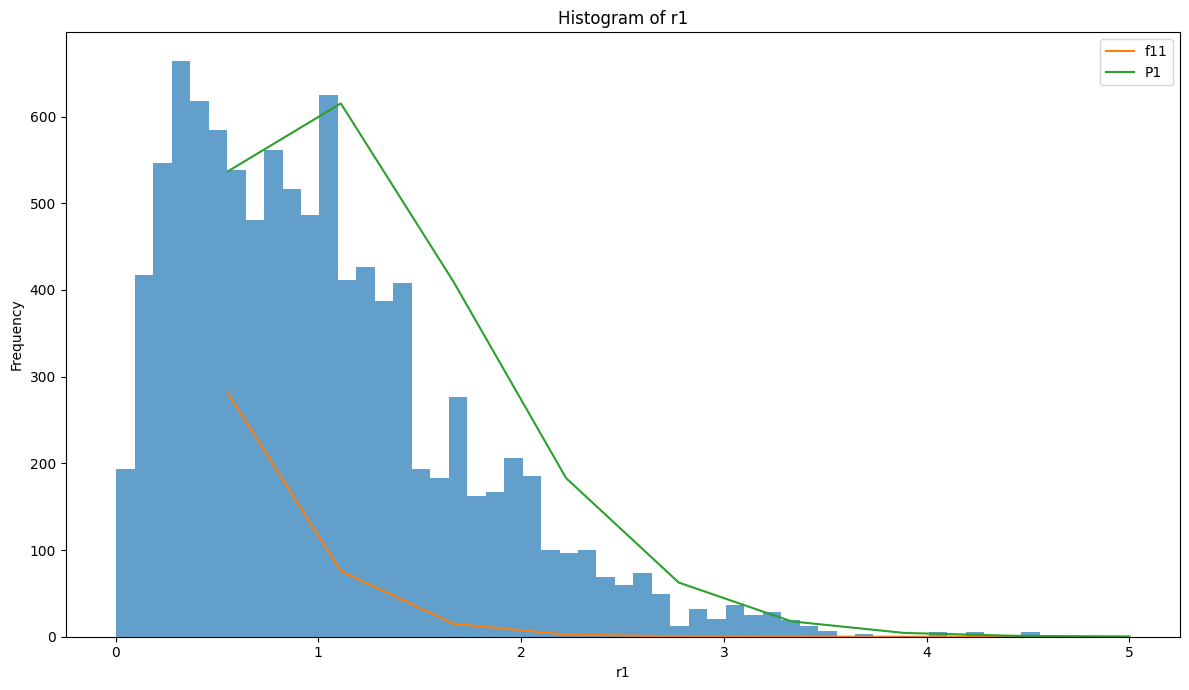

In [72]:
fig, axs = plt.subplots(figsize=(12, 7))

axs.hist(samples_f[:, 0], bins=50, alpha=0.7)
axs.plot(r1, -50000 * f_11_2d, label = 'f11')
axs.plot(r1, -25000 * P_1_2d, label = 'P1')
axs.set_title(f'Histogram of r1')
axs.set_xlabel('r1')
axs.set_ylabel('Frequency')
axs.legend()

plt.tight_layout()
plt.show()

# We did a 2d plot of Sampling function P which depends only on r1 keeping other values as fixed. It is compared with the histogram of r1. The result doesn't seems good but it should also be noted that number of samples taken are comparitively less.

In [73]:
## We also have to find the integration of the denominator

# Define the function
def g(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = g_11_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi2 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result) or np.isinf(result):
          return -np.inf

        else:
          return result

    else:
        return 0

def q(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_q = G_1_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi1 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result_q) or np.isinf(result_q):
          return -np.inf

        else:
          return result_q

    else:
        return 0

In [74]:
# Parameters
initial_point = X_features[11021]
num_samples = 10000
proposal_std = 1.8

# Run Metropolis sampling
result = metropolis_sampling(g, q, initial_point, num_samples, proposal_std)

samples_g = result[0]
num_accept = result[1]

# Perform Monte Carlo integration
integral_estimate_g11 = monte_carlo_integration(samples_g, g)
print(f"Estimated integral: {integral_estimate_g11}")
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Estimated integral: 1.3252369664671315
Number of Samples Accepted: 2401
Fraction Acceptances: 0.2401


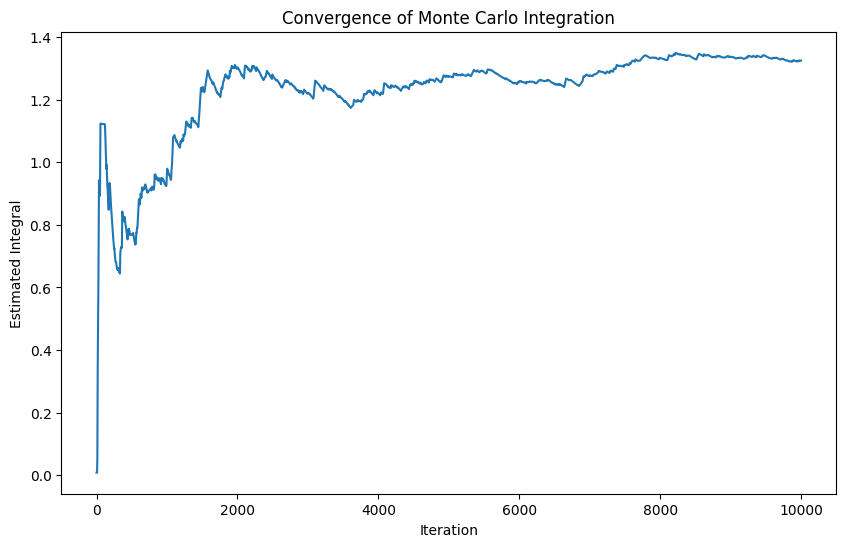

In [75]:
# Plot the running mean of the estimated integral over iterations to see if the Monte Carlo estimate is converging.

values_g = np.array([g(sample) for sample in samples_g])
# Filter out -inf values
values_g = values_g[~np.isnan(values_g) & ~np.isinf(values_g)]

# Running mean of the integral estimate
integral_estimates = np.cumsum(values_g) * (5 * 5 * np.pi * np.pi * 2*np.pi * 2*np.pi) / np.arange(1, len(values_g) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration')
plt.show()

In [76]:
H_11 = integral_estimate_f11/integral_estimate_g11
H_11

-16.147714961373744

In [77]:
## The same procedure has been followed to calculate other elements of the Hamiltonian matrix.